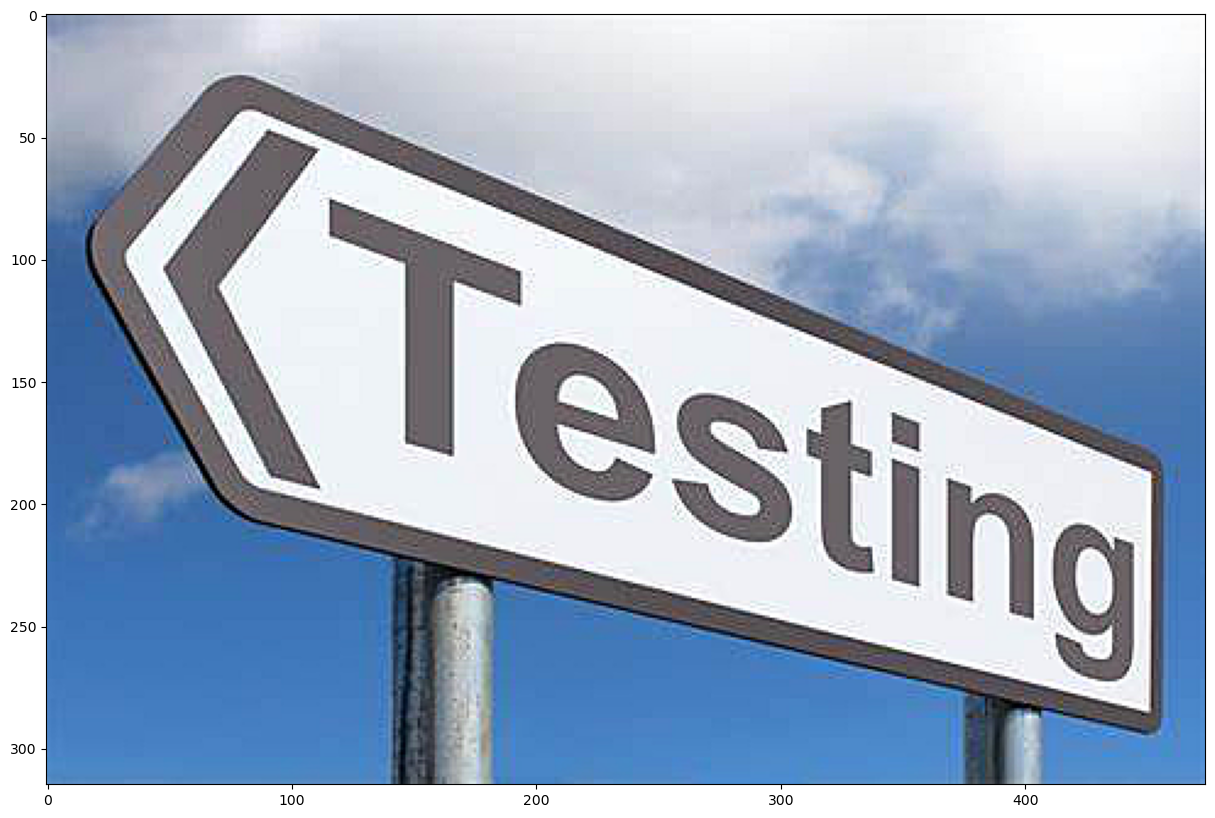

In [42]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

img = cv2.imread('/home/hask/Project/cv_homework/lesson3/data/test.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

kernel_size=(3, 3)
sigma = 1.0
amount = 1.0

unsharp = cv2.GaussianBlur(img, kernel_size, sigma)

# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = img - unsharp

sharpened = float(amount + 1) * img - float(amount) * unsharp
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
sharpened = img + diff * amount
# 


sharpened = sharpened.round().astype(np.uint8)

plt.imshow(sharpened)

def unsharp_mask(image, kernel_size=(15, 15), sigma=1.0, amount=1.0
                 xxx, threshold=0):
    # Gaussian blur the image
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    
    # Calculate the sharpened image
    sharpened = float(amount + 1) * image - float(amount) * blurred
    
    # Clip the values to [0, 255] and convert back to uint8
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    
    return sharpened

res = unsharp_mask(img)
plt.imshow(res)
